In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import seaborn as sns

## Loading Dataset

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (42000, 785)
test shape: (28000, 784)


> There're 42000 images and 785 pixel (28*28) in the train dataset

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
y_train = train["label"]
# drop label column from dataset
x_train = train.drop(["label"], axis=1)

## Visualize the data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


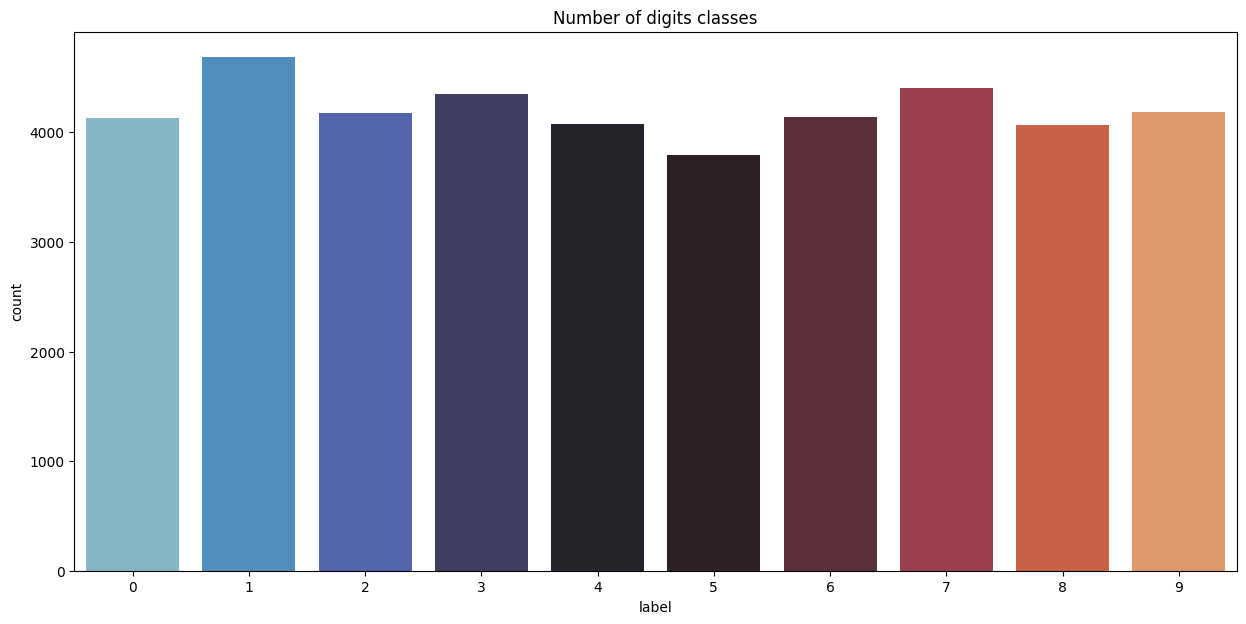

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(x=y_train, palette="icefire")
plt.title(f"Number of digits classes")
print(y_train.value_counts())
plt.show()

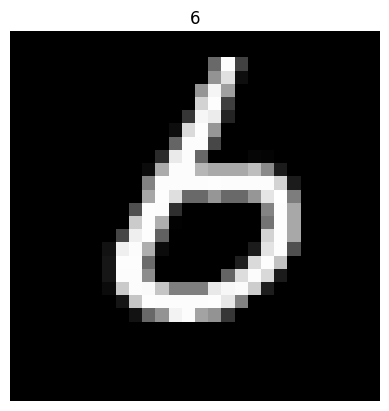

In [ ]:
import random

def view_random():
  random_number = random.randint(0, len(x_train))
  random_img = x_train.iloc[random_number].values
  random_img = random_img.reshape((28,28))
  plt.imshow(random_img, cmap="gray")
  plt.title(train.iloc[random_number, 0])
  plt.axis("off")
  plt.show()

view_random()

## Normalization, Reshape and Encoding

**Normalization:**
  * We perform a grayscale normalization to reduce the effect of illumination's differences
  * If we perform normalization, CNN works faster.

**Reshape:**
  * Train and test images are 28x28.
  * We reshape all data to 28x28x1 3D matrices.
  * Keras needs an extra dimension in the end which correspond **the channels**. Our images are gray scaled so it use only one channel.

**Label encoding:**
  * Encode labels to one hot vectors:
    * 0 -> [0,0,0,0,0,0,0,0,0,0]
    * 1 -> [0,1,0,0,0,0,0,0,0,0]
    * 2 -> [0,0,1,0,0,0,0,0,0,0]
    * 4 -> [0,0,0,0,1,0,0,0,0,0]

In [ ]:
# Normalize the data
X_train = x_train / 255.
test = test / 255.

# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

print("shape of train: ", X_train.shape )
print("shape of test: ", test.shape )

shape of train:  (42000, 28, 28, 1)
shape of test:  (28000, 28, 28, 1)


In [ ]:
# Label encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes = 10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Train - Test Split

> We gonna split the data %90 size is train and %10 is test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (37800, 28, 28, 1)
Shape of X_val: (4200, 28, 28, 1)
Shape of y_train: (37800, 10)
Shape of y_val: (4200, 10)
